# 6.2 Understanding Recurrent Neural Networks (RNN)
---

## Listing 6.19 Pseudocode RNN
---

```python
# Initial state
state_t = 0

# Iterates over sequence elements
for input_t in input_sequence:
    # Inputs of RNN: input at t and state at t
    output_t = rnn(input_t, state_t)
    
    # The previous output becomes the state for the next iteration.
    state_t = output_t
```

## Listing 6.20 More detailed pseudocode for the RNN
---

```python
# Initial state
state_t = 0

# Iterates over sequence elements
for input_t in input_sequence:
    # Inputs of RNN: input at t and state at t
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    
    # The previous output becomes the state for the next iteration.
    state_t = output_t
```

## Listing 6.21 Numpy implementation of a simple RNN
---

In [1]:
import numpy as np

%load_ext version_information
%version_information numpy

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
numpy 1.15.2
Thu Nov 08 17:31:54 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [2]:
# #Timesteps in the input sequence
timesteps = 100
# Dimensionality of the input feature space
input_features = 32
# Dimensionality of the output feature space
output_features = 64

In [3]:
# Input data
inputs = np.random.random((timesteps, input_features))

print(inputs.dtype, inputs.shape)

float64 (100, 32)


In [4]:
# Initial state
state_t = np.zeros((output_features,))

print(state_t.dtype, state_t.shape)

float64 (64,)


In [5]:
# Weight matrices
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
print('W (for input_t): ', W.dtype, W.shape)
print('U (for state_t): ', U.dtype, U.shape)
print('b (bias): ', b.dtype, b.shape)

W (for input_t):  float64 (64, 32)
U (for state_t):  float64 (64, 64)
b (bias):  float64 (64,)


In [6]:
successive_outputs = []

for input_t in inputs:
    # Combines the input with the current state (the previous output) to obtain the current output
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successive_outputs.append(output_t)
    
    # Updates the state of the network for the next timestep
    state_t = output_t

In [7]:
print(len(successive_outputs))
successive_outputs[0]

100


array([0.99999999, 1.        , 1.        , 0.99999999, 1.        ,
       1.        , 1.        , 0.99999997, 0.99999991, 0.99999999,
       0.99999998, 1.        , 1.        , 1.        , 0.99999996,
       1.        , 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 0.99999999, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 0.99999999, 0.99999997, 1.        ,
       0.99999996, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999999, 1.        , 0.99999993, 1.        ,
       1.        , 0.99999999, 0.99999997, 1.        , 0.99999998,
       0.9999999 , 1.        , 0.99999999, 0.99999999, 1.        ,
       0.99999998, 1.        , 1.        , 1.        , 1.        ,
       0.99999995, 0.99999998, 0.99999995, 1.        ])

In [8]:
# The final output is a 2D tensor of shape (timesteps, output_features).
final_output_sequence = np.asarray(successive_outputs)

print(final_output_sequence.dtype, final_output_sequence.shape)
final_output_sequence[0]

float64 (100, 64)


array([0.99999999, 1.        , 1.        , 0.99999999, 1.        ,
       1.        , 1.        , 0.99999997, 0.99999991, 0.99999999,
       0.99999998, 1.        , 1.        , 1.        , 0.99999996,
       1.        , 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 0.99999999, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 0.99999999, 0.99999997, 1.        ,
       0.99999996, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999999, 1.        , 0.99999993, 1.        ,
       1.        , 0.99999999, 0.99999997, 1.        , 0.99999998,
       0.9999999 , 1.        , 0.99999999, 0.99999999, 1.        ,
       0.99999998, 1.        , 1.        , 1.        , 1.        ,
       0.99999995, 0.99999998, 0.99999995, 1.        ])

## Listing 6.22 Preparing the IMDB data
---

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

%reload_ext version_information
%version_information keras

Using TensorFlow backend.


Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
keras 2.2.4
Thu Nov 08 17:31:55 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

### A recurrent layer in Keras
---

Returns only the output at the last timestep.
* Output shape: (batch_size, output_features)

In [10]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))    # return_sequences=False (default)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Returns the full state sequence.
* Output shape: (batch_size, timesteps, output_features)

In [11]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Stacked several recurrent layers.

In [12]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### Preprocessing IMDB data

In [13]:
from keras.datasets import imdb
from keras.preprocessing import sequence

%reload_ext version_information
%version_information keras

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
keras 2.2.4
Thu Nov 08 17:31:56 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [14]:
max_features = 10000
max_len = 500
batch_size = 32

In [15]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [16]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## Listing 6.23 Training the model with Embedding and SimpleRNN layers
---

In [17]:
from keras.layers import Dense, Embedding, SimpleRNN

%reload_ext version_information
%version_information keras

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
keras 2.2.4
Thu Nov 08 17:31:59 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [18]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 556us/step - loss: 0.6537 - acc: 0.5998 - val_loss: 0.5667 - val_acc: 0.7086
Epoch 2/10
20000/20000 [==============================] - 11s 540us/step - loss: 0.4193 - acc: 0.8177 - val_loss: 0.4351 - val_acc: 0.8050
Epoch 3/10
20000/20000 [==============================] - 11s 540us/step - loss: 0.2971 - acc: 0.8815 - val_loss: 0.3573 - val_acc: 0.8596
Epoch 4/10
20000/20000 [==============================] - 11s 553us/step - loss: 0.2264 - acc: 0.9109 - val_loss: 0.3923 - val_acc: 0.8286
Epoch 5/10
20000/20000 [==============================] - 11s 546us/step - loss: 0.1583 - acc: 0.9435 - val_loss: 0.5000 - val_acc: 0.8314
Epoch 6/10
20000/20000 [==============================] - 11s 541us/step - loss: 0.1081 - acc: 0.9639 - val_loss: 0.4243 - val_acc: 0.8570
Epoch 7/10
20000/20000 [==============================] - 11s 555us/step - loss: 0.0731 - acc: 0.9775 - val_loss: 0.5

## Listing 6.24 Plotting results
---

In [20]:
import matplotlib.pyplot as plt

%reload_ext version_information
%version_information matplotlib

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
matplotlib 2.2.2
Thu Nov 08 17:33:49 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

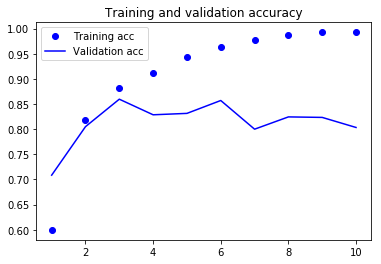

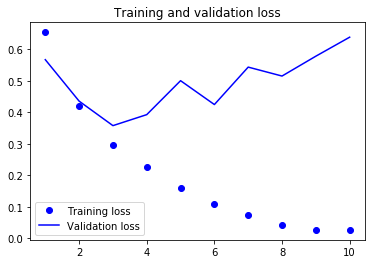

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Part of the problem is that your inputs **only consider the first 500 words**, rather than full sequences—hence, the RNN has access to less information than the earlier baseline model. The remainder of the problem is that **SimpleRNN isn’t good at processing long sequences**, such as text.

## Listing 6.25 Pseudocode details of the LSTM architecture (1/2)
---

All three have the form of a SimpleRNN cell:

```
y = activation(dot(state_t, U) + dot(input_t, W) + b)
```


But all three transformations have their own weight matrices, which you’ll index with the letters i, f, and k.

```python
output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)
```

## Listing 6.26 Pseudocode details of the LSTM architecture (2/2)
---

You obtain the new carry state (the next c_t) by combining i_t, f_t, and k_t.

```python
c_t+1 = i_t * k_t + c_t * f_t
```

## Listing 6.27 Using the LSTM layer in Keras
---

In [22]:
from keras.layers import LSTM

%reload_ext version_information
%version_information keras

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
keras 2.2.4
Thu Nov 08 17:33:49 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [23]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.5052 - acc: 0.7643 - val_loss: 0.3376 - val_acc: 0.8576
Epoch 2/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.2897 - acc: 0.8856 - val_loss: 0.3262 - val_acc: 0.8630
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.2311 - acc: 0.9121 - val_loss: 0.3612 - val_acc: 0.8644
Epoch 4/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1954 - acc: 0.9277 - val_loss: 0.2909 - val_acc: 0.8722
Epoch 5/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1729 - acc: 0.9378 - val_loss: 0.3211 - val_acc: 0.8868
Epoch 6/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.1554 - acc: 0.9429 - val_loss: 0.4317 - val_acc: 0.8760
Epoch 7/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1402 - acc: 0.9507 - val_loss: 0.3818 - val_acc:

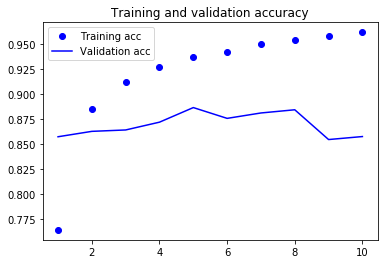

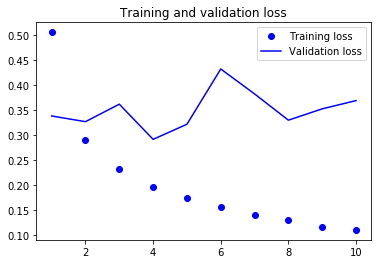

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()